<a href="https://colab.research.google.com/github/nghochi123/python-stuff/blob/master/NeuralNetsBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['fake_reg.csv']))

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


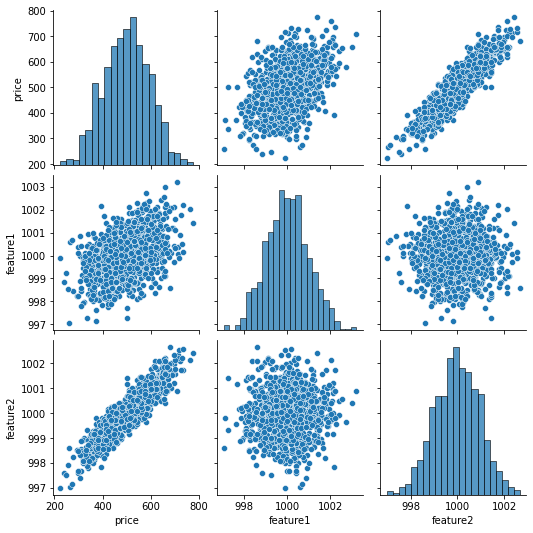

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1', 'feature2']].values

In [ ]:
y = df['price'].values

In [ ]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [ ]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train) # Calculates standard deviation, min and max

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256676.3438
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256618.6094
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256553.0469
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256473.5781
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256378.5156
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256267.1094
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256139.0781
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255992.5000
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255825.0938
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255635.8594
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255421.3906
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [ ]:
loss_df = pd.DataFrame(model.history.history)

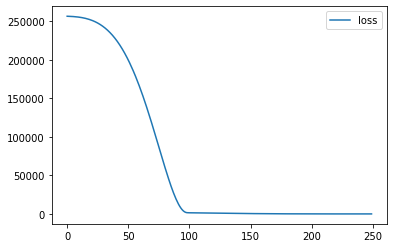

In [ ]:
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 25.0353


25.0352783203125

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


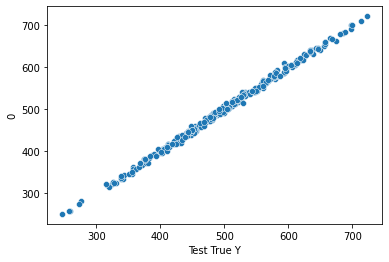

In [ ]:
sns.scatterplot(x='Test True Y', y=0, data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(pred_df['Test True Y'], pred_df[0]))
print(mean_squared_error(pred_df['Test True Y'], pred_df[0]))

4.012232641008688
25.03528209366822


In [ ]:
new_item = [[998,1000]]
new_item = scaler.transform(new_item)
model.predict(new_item)

array([[419.9815]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5')

In [ ]:
later_model = load_model('my_model.h5')

In [ ]:
later_model.predict(new_item)

array([[419.9815]], dtype=float32)